<a href="https://colab.research.google.com/github/bunnynoddy14/Lead_score/blob/main/Lead_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lead Scoring Case Study

## Problem Statement
### The education company, X Education, wants to identify the most potential leads so that their Sales team can focus more on communicating with these potential leads in order to successfully convert them.

### Importing libraries

In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

## Reading the Data and Understanding Data

In [564]:
df = pd.read_csv('/content/Leads.csv')

In [565]:
## Reading heads of Data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [566]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [567]:
## checking the shape of data and info
df.shape

(9240, 37)

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [569]:
## Checking null values in data
df.isnull().sum().sort_values(ascending=False)

,0
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


In [570]:
# Drop all the columns in which greater than 3000 missing values are present
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, axis=1, inplace=True)


In [571]:
df.shape

(9240, 31)

In [572]:
## checking null value % for each columns
df.isnull().sum()/df.shape[0]*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [573]:
## Most of the columns contains "Select" which is nothing but the data not provided and can be counted as Null value
## Checking those value from each columns
for col in df.columns:
    print(df[col].astype('category').value_counts())
    print("********************************")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
********************************
Lead 

In [574]:
## checking values of Lead source
df['Lead Source'].value_counts()

,count
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


In [575]:
## removing values from Lead source which has less then 100 counts
values_to_remove = ['bing', 'google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog','NC_EDM']
df = df[~df['Lead Source'].isin(values_to_remove)]

In [576]:
## Lead profile, Specialisation and How did you hear about X Education seems very less realted data hence can be dropped
df.drop(['Lead Profile','Specialization','How did you hear about X Education'],axis=1,inplace=True)

In [577]:
# df.drop(['Lead Origin','Lead Source'],axis=1,inplace=True)

In [578]:
df.drop(['Last Notable Activity'],axis=1,inplace=True)

In [579]:
df.isnull().sum()/df.shape[0]*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.390795
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.487191
Total Time Spent on Website,0.000000
Page Views Per Visit,1.487191


In [580]:
## Checking Lead quality columns info
df.shape

(9212, 27)

### Few columns we observed that they have same values in all as No or Do Not Call. so it is better to drop them as well.

In [581]:
# Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points.Let's drop them as well.
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content', 'Get updates on DM Content',
 'I agree to pay the amount through cheque'], axis=1, inplace=True)


In [582]:
## Checking null values in current data set again
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137
Last Activity,103


In [583]:
## checking th value in What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,6513
Flexibility & Convenience,2
Other,1


In [584]:
## Dropping What matters most to you in choosing a course	since it has mostly the same value in all the columns
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [585]:
df.isnull().sum().sort_values(ascending=False)

,0
What is your current occupation,2677
Country,2456
City,1414
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Prospect ID,0
Lead Number,0
Lead Origin,0


In [586]:
## In City Null value to be replaced with "Not provided"
df['City'].fillna('Not provided', inplace=True)

In [587]:
df['Country'].fillna('Not provided', inplace=True)

In [588]:
df['What is your current occupation'].fillna('Not provided', inplace=True)

In [589]:
## renaming What is your current occupation to "Occupation"
df = df.rename(columns={'What is your current occupation':'Occupation'})

In [590]:
## Checking the value in What is your current occupation
df['Occupation'].value_counts()

,count
Occupation,
Unemployed,5585
Not provided,2677
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


### We will no drop this column as it may contain useful variables for coefficient and correlations but we can drop the null value present in all the available columns

In [591]:
df.shape

(9212, 14)

In [592]:
## we can drop the null value present in all the available columns
df = df[~pd.isnull(df['Occupation'])]

In [593]:
df.shape

(9212, 14)

In [594]:
## Removing same null value from the rows of "Country", "City", "TotalVisits", "Page Views Per Visit", 	"Last Activity" & "Lead Source"
df = df[~pd.isnull(df['Country'])]

#### Checking the null values for the below 4 columns

In [595]:
df.shape

(9212, 14)

In [596]:
df = df[~pd.isnull(df['TotalVisits'])]
df = df[~pd.isnull(df['Page Views Per Visit'])]
df = df[~pd.isnull(df['Last Activity'])]
# df = df[~pd.isnull(df['Lead Source'])]

In [597]:
df.shape

(9075, 14)

In [598]:
df.isnull().sum().sort_values(ascending=False)

,0
Lead Source,29
Prospect ID,0
Lead Number,0
Lead Origin,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


In [599]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Select,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Select,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No


In [600]:
## Furthermore as columns Prospect ID	Lead Number does not provide any help in creating useful insights, better to drop them
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [601]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Select,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Select,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No


In [602]:
## checking City values
df.City.value_counts()

,count
City,
Mumbai,3171
Select,2177
Not provided,1413
Thane & Outskirts,741
Other Cities,676
Other Cities of Maharashtra,446
Other Metro Cities,377
Tier II Cities,74


In [603]:
## In City replacing "Select" as "Not Provided"
df.City.replace('Select', 'Not Provided', inplace=True)
## Combining "Other cities" and "Other cities of Maharashtra" into "Other Cities"
df.City.replace({'Other Cities of Maharashtra':'Other Cities'}, inplace=True)
df.City.replace({'Thane & Outskirts':'Thane'}, inplace=True)

In [604]:
df.City.value_counts()

,count
City,
Mumbai,3171
Not Provided,2177
Not provided,1413
Other Cities,1122
Thane,741
Other Metro Cities,377
Tier II Cities,74


In [605]:
df.City.value_counts()

,count
City,
Mumbai,3171
Not Provided,2177
Not provided,1413
Other Cities,1122
Thane,741
Other Metro Cities,377
Tier II Cities,74


In [606]:
# ##Checking value count of Last Notable Activity variable
# df['Last Notable Activity'].value_counts()

In [607]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Not Provided,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Not Provided,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No


In [608]:
## Checking value count of Country
df.Country.value_counts()

,count
Country,
India,6470
Not provided,2319
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


In [609]:
## Drop country as well since it has all India almost
df.drop('Country', axis=1, inplace=True)

In [610]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

## Creating dummy variables

In [611]:
## creating dummy variables for categorical columns
# dummy = pd.get_dummies(df[['Lead Origin', 'City', 'Lead Source', 'Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity']], drop_first=True, dtype=int)
# dummy = pd.get_dummies(df[['City','Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity']], drop_first=True, dtype=int)
dummy = pd.get_dummies(df[['City','Last Activity',
                              'Occupation','A free copy of Mastering The Interview','Lead Source','Lead Origin']], drop_first=True, dtype=int)

In [612]:
## concating them to master file
df = pd.concat([df, dummy], axis=1)

In [613]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,City,...,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Not Provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Not Provided,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Mumbai,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Mumbai,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Mumbai,...,0,1,0,0,0,0,0,1,0,0


In [614]:
## Dropping all the dummy variable which is created
# df.drop(['Lead Origin', 'Lead Source', 'City', 'Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity'], axis=1, inplace=True)

# df.drop(['City', 'Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview',
#                               'Last Notable Activity'], axis=1, inplace=True)
df.drop(['City', 'Last Activity',
                              'Occupation','A free copy of Mastering The Interview','Lead Source','Lead Origin'], axis=1, inplace=True)

In [615]:
## renaming column "do not email" as "Contact Via Email"
df = df.rename(columns={'Do Not Email': 'Contact Via Email'})
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,No,0,0.0,0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,No,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,No,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,No,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,No,1,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [616]:
def binary_map(x):
  return x.map({'Yes': 0, 'No': 1})

In [617]:
df[['Contact Via Email']] = df[['Contact Via Email']].apply(binary_map)

In [618]:
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,1,0,0.0,0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9075 entries, 0 to 9239
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Contact Via Email                           9075 non-null   int64  
 1   Converted                                   9075 non-null   int64  
 2   TotalVisits                                 9075 non-null   float64
 3   Total Time Spent on Website                 9075 non-null   int64  
 4   Page Views Per Visit                        9075 non-null   float64
 5   City_Not Provided                           9075 non-null   int64  
 6   City_Not provided                           9075 non-null   int64  
 7   City_Other Cities                           9075 non-null   int64  
 8   City_Other Metro Cities                     9075 non-null   int64  
 9   City_Thane                                  9075 non-null   int64  
 10  City_Tier II Citi

In [620]:
df_temp = df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
df_temp.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9075.000000,9075.000000,9075.000000
mean,3.443967,481.380496,2.361488
std,4.858594,545.443492,2.160690
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,918.500000,3.000000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


<Axes: ylabel='TotalVisits'>

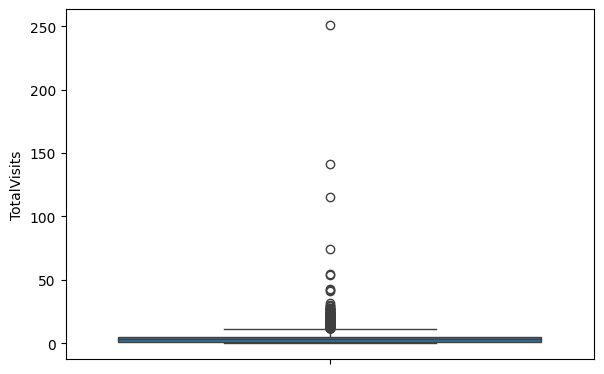

In [621]:
## checking outlier in TotalVisits columns with boxplot
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(df['TotalVisits'])

In [622]:
## Removing outlier from Totalvisits columns
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.99)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['TotalVisits'] >= lower_bound) & (df['TotalVisits'] <= upper_bound)]


In [623]:
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,1,0,0.0,0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [624]:
df.shape

(9067, 44)

### Taking Train Test Split

In [625]:
from sklearn.model_selection import train_test_split

In [626]:
## Dropping target variable converted column and savng intonew variable called X
X = df.drop('Converted', axis=1)

In [627]:
y = df['Converted']

In [628]:
X.head()

,Contact Via Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,City_Tier II Cities,...,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,1,0.0,0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [629]:
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [630]:
## Splitting into 70% train data and 30% split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [631]:
## Further scalling to the numeric numericals present in the data set
from sklearn.preprocessing import MinMaxScaler

In [632]:
## Scaling numeric variables in data set
scaler = MinMaxScaler()

In [633]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Contact Via Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,City_Tier II Cities,...,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
4361,1,0.121951,0.236573,0.208333,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,0.195122,0.398580,0.166667,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8859,1,0.121951,0.533511,0.208333,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5560,1,0.048780,0.435419,0.083333,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3597,1,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [634]:
## looking at the correlation of the dataset now
df.select_dtypes(include=[float, int]).corr()


,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Not Provided,City_Not provided,City_Other Cities,City_Other Metro Cities,City_Thane,...,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
Contact Via Email,1.000000,0.134965,-0.005034,0.049473,-0.019034,0.046629,0.017404,-0.006963,-0.039503,0.009274,...,0.017138,0.071421,0.051020,-0.035606,0.035942,0.013087,-0.002859,-0.094099,0.020500,0.017138
Converted,0.134965,1.000000,0.045583,0.355848,0.001149,0.114552,-0.240365,0.029215,0.011959,0.041626,...,-0.010892,0.027064,-0.126087,-0.002198,0.254354,-0.031055,0.149419,-0.039241,0.305524,-0.010892
TotalVisits,-0.005034,0.045583,1.000000,0.311174,0.674653,-0.244144,-0.225282,0.094425,0.065671,0.088858,...,-0.050423,0.168932,-0.426346,0.282805,-0.201401,0.073822,-0.109333,0.388436,-0.239063,-0.052610
Total Time Spent on Website,0.049473,0.355848,0.311174,1.000000,0.331951,-0.167295,-0.210799,0.091256,0.050745,0.076526,...,-0.050073,0.217465,-0.377199,0.102134,-0.162245,0.012108,-0.091691,0.294769,-0.194535,-0.051417
Page Views Per Visit,-0.019034,0.001149,0.674653,0.331951,1.000000,-0.278644,-0.276714,0.127298,0.098354,0.091484,...,-0.055218,0.217997,-0.518094,0.318707,-0.239183,0.085991,-0.129192,0.499843,-0.283120,-0.058842
City_Not Provided,0.046629,0.114552,-0.244144,-0.167295,-0.278644,1.000000,-0.241516,-0.211129,-0.117079,-0.167321,...,-0.032924,-0.049200,0.203404,0.013111,0.193599,0.041221,0.170120,-0.566497,0.268043,-0.028501
City_Not provided,0.017404,-0.240365,-0.225282,-0.210799,-0.276714,-0.241516,1.000000,-0.161382,-0.089493,-0.127896,...,-0.025166,-0.063393,0.433355,-0.050946,-0.097381,0.057388,-0.051618,-0.437518,-0.114581,-0.025166
City_Other Cities,-0.006963,0.029215,0.094425,0.091256,0.127298,-0.211129,-0.161382,1.000000,-0.078233,-0.111805,...,0.069841,-0.060944,-0.135522,0.062658,-0.054043,-0.020875,-0.028148,0.239866,-0.063828,0.064101
City_Other Metro Cities,-0.039503,0.011959,0.065671,0.050745,0.098354,-0.117079,-0.089493,-0.078233,1.000000,-0.062000,...,-0.002735,-0.071579,-0.085183,0.084572,-0.039519,0.009006,-0.025023,0.160510,-0.048888,-0.002735
City_Thane,0.009274,0.041626,0.088858,0.076526,0.091484,-0.167321,-0.127896,-0.111805,-0.062000,1.000000,...,-0.003615,0.062068,-0.112025,-0.027749,0.016732,-0.007013,-0.025543,0.153950,0.001621,-0.003615


In [635]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6346 entries, 4361 to 7421
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Contact Via Email                           6346 non-null   int64  
 1   TotalVisits                                 6346 non-null   float64
 2   Total Time Spent on Website                 6346 non-null   float64
 3   Page Views Per Visit                        6346 non-null   float64
 4   City_Not Provided                           6346 non-null   int64  
 5   City_Not provided                           6346 non-null   int64  
 6   City_Other Cities                           6346 non-null   int64  
 7   City_Other Metro Cities                     6346 non-null   int64  
 8   City_Thane                                  6346 non-null   int64  
 9   City_Tier II Cities                         6346 non-null   int64  
 10  Last Activity_

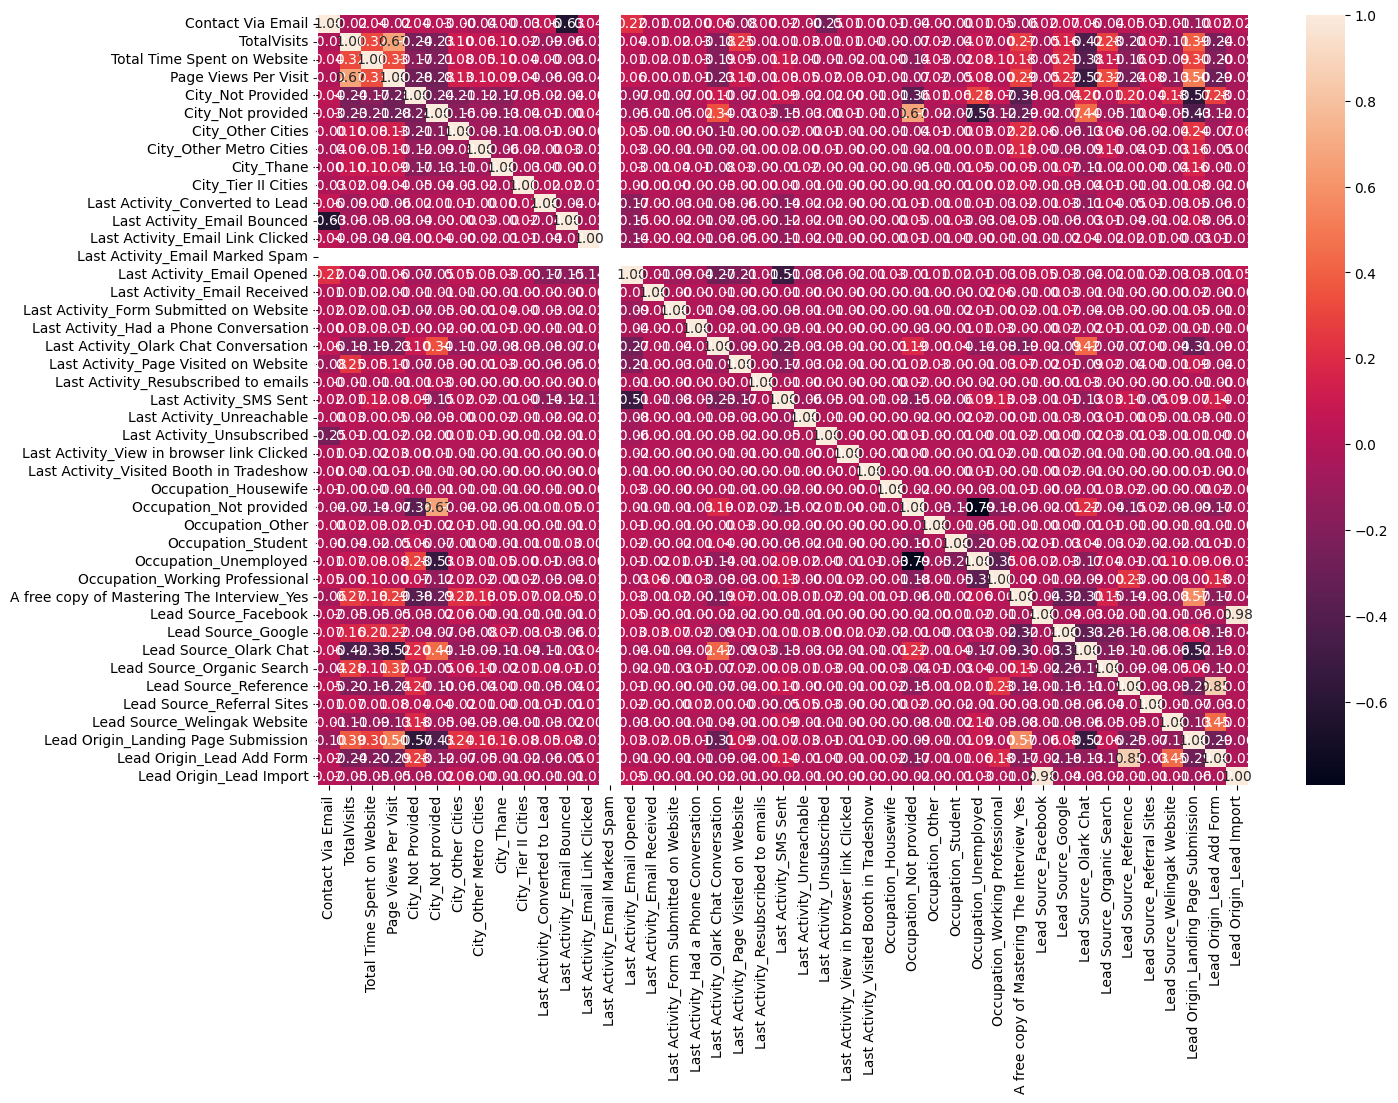

In [636]:
## visuaize X train model in heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f')
plt.show()


In [637]:
## Filtering out highly corelated
corr_matrix = X_train.corr()

In [638]:
high_corr_cols = corr_matrix[(((corr_matrix) > 0.8) & (corr_matrix != 1)) | (((corr_matrix) < -0.3) & (corr_matrix != -1))]
# high_corr_cols = corr_matrix[(((corr_matrix) < -0.1))]

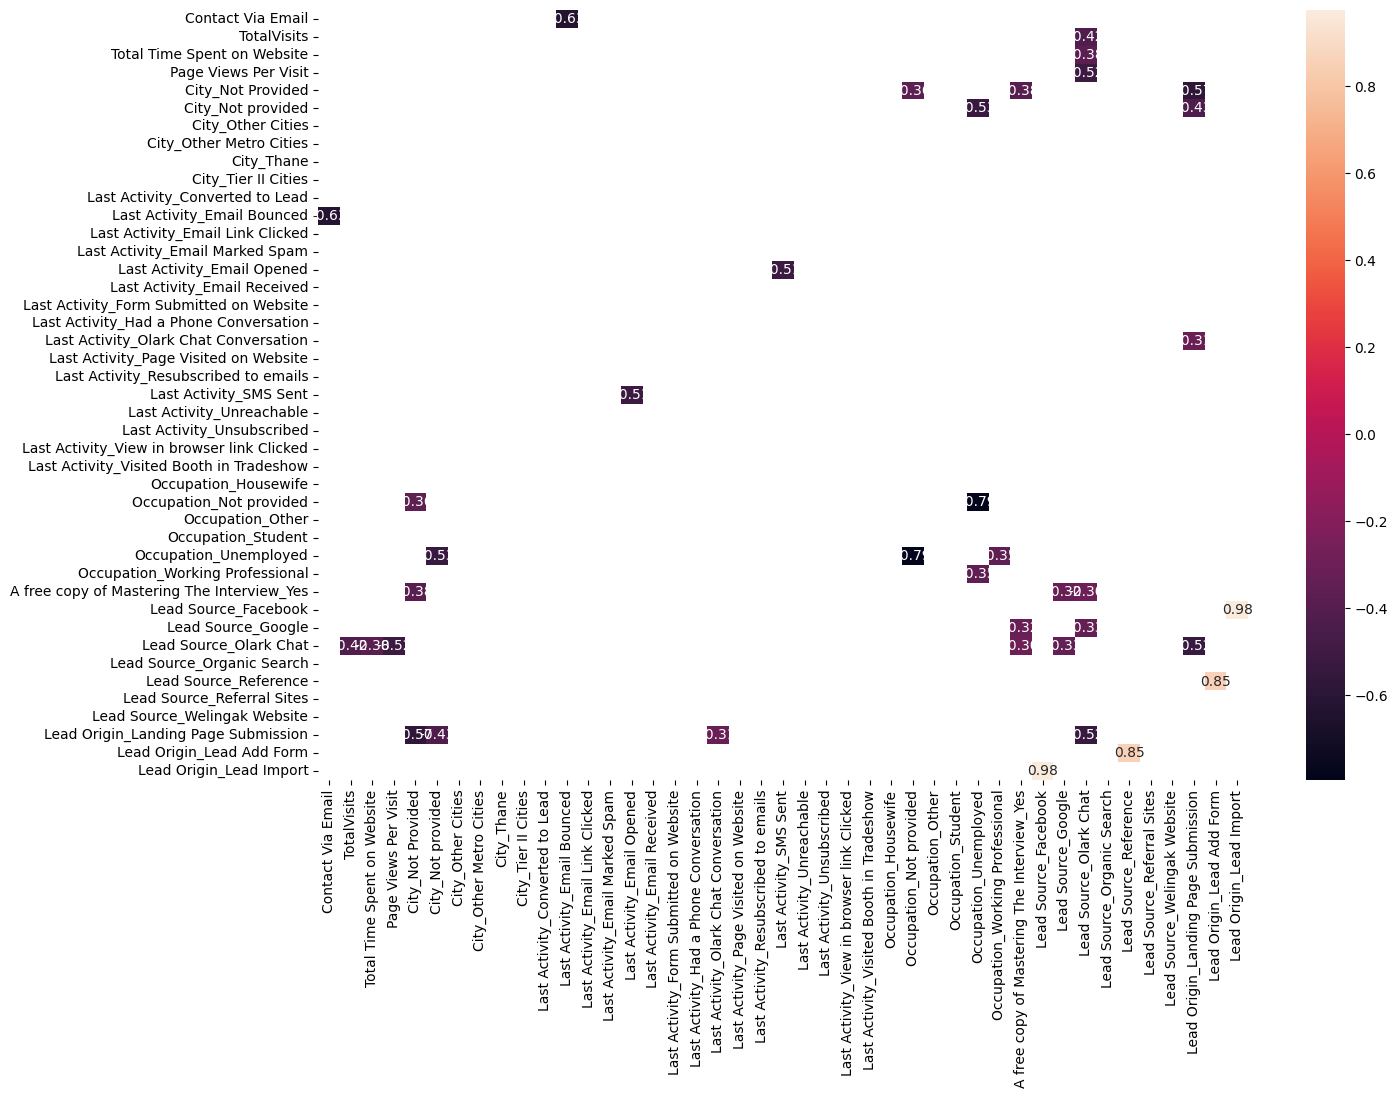

In [639]:
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_cols, annot=True, fmt='.2f')
plt.show()

In [640]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 23 Dec 2024   Deviance:                   1.5630e+05
Time:                        17:28:30   Pearson chi2:                 7.64e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         5.8e+14   4.14e+07    1.4e+07      0.000     5.8e+14     5.8e+14
Contact Via Email                          -9.612e+13   4.43e+06  -2.17e+07      0.000   -9.61e+13   -9.61e+13
TotalVisits                                 1.112e+15   1.42e+07   7.84e+07      0.000    1.11e+15    1.11e+15
Total Time Spent on Website                 3.261e+15   4.09e+06   7.98e+08      0.000    3.26e+15    3.26e+15
Page Views Per Visit                       -8.304e+14   1.52e+07  -5.46e+07      0.000    -8.3e+14    -8.3e+14
City_Not Provided                           5.169e+14   3.59e+06   1.44e+08      0.000    5.17e+14    5.17e+14
City_Not provided                           7.177e+14   4.63e+06   1.55e+08      0.000    7.18e+14    7.18e+14
City_Other Cities                           8.068e+13   2.83e+06   2.85e+07      0.000    8.07e+13    8.07e+13
City_Other Metro Cities                     1.124e+13   4.41e+06   2.55e+06      0.000    1.12e+13    1.12e+13
City_Thane                                  1.359e+14   3.28e+06   4.14e+07      0.000    1.36e+14    1.36e+14
City_Tier II Cities                         7.486e+12   9.74e+06   7.69e+05      0.000    7.49e+12    7.49e+12
Last Activity_Converted to Lead            -4.411e+15   3.03e+07  -1.45e+08      0.000   -4.41e+15   -4.41e+15
Last Activity_Email Bounced                -4.997e+15   3.07e+07  -1.63e+08      0.000      -5e+15      -5e+15
Last Activity_Email Link Clicked           -3.763e+15   3.05e+07  -1.24e+08      0.000   -3.76e+15   -3.76e+15
Last Activity_Email Marked Spam               12.3785   6.48e-08   1.91e+08      0.000      12.378      12.378
Last Activity_Email Opened                 -3.644e+15   3.01e+07  -1.21e+08      0.000   -3.64e+15   -3.64e+15
Last Activity_Email Received               -1.087e+15   5.63e+07  -1.93e+07      0.000   -1.09e+15   -1.09e+15
Last Activity_Form Submitted on Website    -4.374e+15   3.09e+07  -1.42e+08      0.000   -4.37e+15   -4.37e+15
Last Activity_Had a Phone Conversation     -3.772e+15   3.42e+07   -1.1e+08      0.000   -3.77e+15   -3.77e+15
Last Activity_Olark Chat Conversation      -3.856e+15   3.02e+07  -1.28e+08      0.000   -3.86e+15   -3.86e+15
Last Activity_Page Visited on Website      -4.121e+15   3.03e+07  -1.36e+08      0.000   -4.12e+15   -4.12e+15
Last Activity_Resubscribed to emails        1.507e+15   7.36e+07   2.05e+07      0.000    1.51e+15    1.51e+15
Last Activity_SMS Sent                     -4.686e+15   3.01e+07  -1.56e+08      0.000   -4.69e+15   -4.69e+15
Last Activity_Unreachable                  -3.883e+15   3.13e+07  -1.24e+08      0.000   -3.88e+15   -3.88e+15
Last Activity_Unsubscribed                 -4.035e+15   3.22e+07  -1.25e+08      0.000

In [641]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [642]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Contact Via Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('City_Not Provided', False, 4),
 ('City_Not provided', False, 3),
 ('City_Other Cities', False, 26),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane', False, 25),
 ('City_Tier II Cities', False, 28),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Marked Spam', False, 29),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Email Received', False, 22),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_Resubscribed to emails', False, 7),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 15),
 ('Last Activity_Uns

In [643]:
col = X_train.columns[rfe.support_]

In [644]:
X_train.columns[~rfe.support_]

Index(['City_Not Provided', 'City_Not provided', 'City_Other Cities',
       'City_Other Metro Cities', 'City_Thane', 'City_Tier II Cities',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'A free copy of Mastering The Interview_Yes', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import'],
      dtype='object')

#### Assessing the model with StatsModels

In [645]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.6
Date:                Mon, 23 Dec 2024   Deviance:                       5221.2
Time:                        17:28:32   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.6398      0.196    -18.538      0.000      -4.025      -3.255
Contact Via Email                          1.5270      0.172      8.875      0.000       1.190       1.864
TotalVisits                                2.2996      0.527      4.363      0.000       1.267       3.333
Total Time Spent on Website                4.5673      0.168     27.165      0.000       4.238       4.897
Page Views Per Visit                      -1.6351      0.577     -2.835      0.005      -2.766      -0.505
Last Activity_Converted to Lead           -0.9741      0.210     -4.639      0.000      -1.386      -0.563
Last Activity_Had a Phone Conversation     2.3717      0.770      3.080      0.002       0.863       3.881
Last Activity_Olark Chat Conversation     -1.1986      0.158     -7.583      0.000      -1.508      -0.889
Last Activity_SMS Sent                     1.2773      0.076     16.802      0.000       1.128       1.426
Last Activity_Unsubscribed                 1.3588      0.464      2.925      0.003       0.448       2.269
Occupation_Housewife                      22.1306   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Occupation_Not provided                   -1.2505      0.088    -14.277      0.000      -1.422      -1.079
Occupation_Working Professional            2.5775      0.193     13.349      0.000       2.199       2.956
Lead Source_Olark Chat                     1.3280      0.124     10.716      0.000       1.085       1.571
Lead Source_Welingak Website               1.8767      0.750      2.503      0.012       0.407       3.346
Lead Origin_Lead Add Form                  3.6218      0.224     16.179      0.000       3.183       4.061
==========================================================================================================
"""

#### Getting the predicted values on the train set

In [646]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
4361,0.087618
2668,0.761531
8859,0.572105
5560,0.463007
3597,0.037906
4800,0.008485
1851,0.149638
5489,0.513755
3566,0.842200
3303,0.115539


### Getting the predicted values on the train set

In [647]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
4361,0.087618
2668,0.761531
8859,0.572105
5560,0.463007
3597,0.037906
4800,0.008485
1851,0.149638
5489,0.513755
3566,0.842200
3303,0.115539


In [648]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08761794, 0.76153138, 0.57210452, 0.4630069 , 0.03790645,
       0.00848455, 0.14963831, 0.51375466, 0.84219961, 0.11553874])

In [649]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.087618,4361
1,1,0.761531,2668
2,1,0.572105,8859
3,1,0.463007,5560
4,0,0.037906,3597


In [650]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted.map(lambda x: 1 if x > 0.5 else 0)

#### Let's see the head

In [651]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.087618,4361,0
1,1,0.761531,2668,1
2,1,0.572105,8859,1
3,1,0.463007,5560,1
4,0,0.037906,3597,0


In [652]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3915    0]
 [   0 2431]]


### Let's check the overall accuracy.

In [653]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

1.0


### Checking VIFs
#### Check for the VIF values of the feature variables.

In [654]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [655]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Contact Via Email,5.99
3,Page Views Per Visit,4.67
1,TotalVisits,3.58
2,Total Time Spent on Website,2.26
12,Lead Source_Olark Chat,2.24
14,Lead Origin_Lead Add Form,1.72
7,Last Activity_SMS Sent,1.60
10,Occupation_Not provided,1.52
6,Last Activity_Olark Chat Conversation,1.44
13,Lead Source_Welingak Website,1.29


In [656]:
col = col.drop('Contact Via Email', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Occupation_Housewife',
       'Occupation_Not provided', 'Occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Lead Origin_Lead Add Form'],
      dtype='object')

In [657]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.7
Date:                Mon, 23 Dec 2024   Deviance:                       5317.5
Time:                        17:28:33   Pearson chi2:                 6.53e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3893
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2289      0.102    -21.877      0.000      -2.429      -2.029
TotalVisits                                2.2878      0.506      4.520      0.000       1.296       3.280
Total Time Spent on Website                4.5818      0.166     27.603      0.000       4.256       4.907
Page Views Per Visit                      -1.4914      0.565     -2.642      0.008      -2.598      -0.385
Last Activity_Converted to Lead           -0.8742      0.210     -4.168      0.000      -1.285      -0.463
Last Activity_Had a Phone Conversation     2.2734      0.731      3.111      0.002       0.841       3.706
Last Activity_Olark Chat Conversation     -1.1471      0.157     -7.285      0.000      -1.456      -0.838
Last Activity_SMS Sent                     1.2616      0.075     16.793      0.000       1.114       1.409
Last Activity_Unsubscribed                 0.0294      0.442      0.067      0.947      -0.838       0.897
Occupation_Housewife                      22.2289   1.25e+04      0.002      0.999   -2.44e+04    2.45e+04
Occupation_Not provided                   -1.2550      0.087    -14.457      0.000      -1.425      -1.085
Occupation_Working Professional            2.5956      0.191     13.557      0.000       2.220       2.971
Lead Source_Olark Chat                     1.3835      0.123     11.270      0.000       1.143       1.624
Lead Source_Welingak Website               1.7290      0.748      2.312      0.021       0.263       3.195
Lead Origin_Lead Add Form                  3.6619      0.223     16.401      0.000       3.224       4.099
==========================================================================================================
"""

In [658]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
4361,0.080788
2668,0.742064
8859,0.547464
5560,0.438661
3597,0.037419
4800,0.037419
1851,0.137629
5489,0.488688
3566,0.832729
3303,0.109059


In [659]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
4361,0.080788
2668,0.742064
8859,0.547464
5560,0.438661
3597,0.037419
4800,0.037419
1851,0.137629
5489,0.488688
3566,0.832729
3303,0.109059


In [660]:
# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

In [661]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
4361,0,0.080788,4361
2668,1,0.742064,2668
8859,1,0.547464,8859
5560,1,0.438661,5560
3597,0,0.037419,3597


In [662]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted.map(lambda x: 1 if x > 0.5 else 0)

In [663]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
4361,0,0.080788,4361,0
2668,1,0.742064,2668,1
8859,1,0.547464,8859,1
5560,1,0.438661,5560,1
3597,0,0.037419,3597,0


In [664]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3915    0]
 [   0 2431]]


In [665]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

1.0


In [666]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.98
0,TotalVisits,3.47
1,Total Time Spent on Website,1.99
11,Lead Source_Olark Chat,1.58
6,Last Activity_SMS Sent,1.54
9,Occupation_Not provided,1.46
13,Lead Origin_Lead Add Form,1.44
5,Last Activity_Olark Chat Conversation,1.41
12,Lead Source_Welingak Website,1.29
10,Occupation_Working Professional,1.19


In [667]:
col = col.drop('Occupation_Housewife', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Occupation_Not provided',
       'Occupation_Working Professional', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Add Form'],
      dtype='object')

In [668]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.5
Date:                Mon, 23 Dec 2024   Deviance:                       5325.0
Time:                        17:28:34   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2187      0.102    -21.815      0.000      -2.418      -2.019
TotalVisits                                2.2818      0.506      4.510      0.000       1.290       3.273
Total Time Spent on Website                4.5778      0.166     27.603      0.000       4.253       4.903
Page Views Per Visit                      -1.5145      0.564     -2.684      0.007      -2.621      -0.408
Last Activity_Converted to Lead           -0.8804      0.210     -4.198      0.000      -1.291      -0.469
Last Activity_Had a Phone Conversation     2.2679      0.731      3.104      0.002       0.836       3.700
Last Activity_Olark Chat Conversation     -1.1499      0.157     -7.304      0.000      -1.458      -0.841
Last Activity_SMS Sent                     1.2572      0.075     16.746      0.000       1.110       1.404
Last Activity_Unsubscribed                 0.0251      0.442      0.057      0.955      -0.842       0.892
Occupation_Not provided                   -1.2573      0.087    -14.489      0.000      -1.427      -1.087
Occupation_Working Professional            2.5919      0.191     13.540      0.000       2.217       2.967
Lead Source_Olark Chat                     1.3762      0.123     11.221      0.000       1.136       1.617
Lead Source_Welingak Website               1.7214      0.748      2.302      0.021       0.256       3.187
Lead Origin_Lead Add Form                  3.6610      0.223     16.408      0.000       3.224       4.098
==========================================================================================================
"""

In [669]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
4361,0.080899
2668,0.741922
8859,0.546457
5560,0.440209
3597,0.037340
4800,0.037340
1851,0.138409
5489,0.488563
3566,0.832761
3303,0.109117


In [670]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
4361,0,0.080899,4361
2668,1,0.741922,2668
8859,1,0.546457,8859
5560,1,0.440209,5560
3597,0,0.037340,3597


In [671]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted.map(lambda x: 1 if x > 0.5 else 0)

In [672]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
4361,0,0.080899,4361,0
2668,1,0.741922,2668,1
8859,1,0.546457,8859,1
5560,1,0.440209,5560,1
3597,0,0.037340,3597,0


In [673]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3915    0]
 [   0 2431]]


In [674]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

1.0


In [684]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.97
0,TotalVisits,3.47
1,Total Time Spent on Website,1.98
9,Lead Source_Olark Chat,1.58
6,Last Activity_SMS Sent,1.53
7,Occupation_Not provided,1.46
11,Lead Origin_Lead Add Form,1.44
5,Last Activity_Olark Chat Conversation,1.41
10,Lead Source_Welingak Website,1.29
8,Occupation_Working Professional,1.19


In [675]:
col = col.drop('Last Activity_Unsubscribed', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Occupation_Not provided', 'Occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Lead Origin_Lead Add Form'],
      dtype='object')

In [676]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.5
Date:                Mon, 23 Dec 2024   Deviance:                       5325.0
Time:                        17:28:34   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2184      0.102    -21.839      0.000      -2.418      -2.019
TotalVisits                                2.2815      0.506      4.510      0.000       1.290       3.273
Total Time Spent on Website                4.5777      0.166     27.604      0.000       4.253       4.903
Page Views Per Visit                      -1.5141      0.564     -2.683      0.007      -2.620      -0.408
Last Activity_Converted to Lead           -0.8806      0.210     -4.201      0.000      -1.292      -0.470
Last Activity_Had a Phone Conversation     2.2677      0.731      3.104      0.002       0.836       3.700
Last Activity_Olark Chat Conversation     -1.1501      0.157     -7.308      0.000      -1.459      -0.842
Last Activity_SMS Sent                     1.2570      0.075     16.779      0.000       1.110       1.404
Occupation_Not provided                   -1.2572      0.087    -14.490      0.000      -1.427      -1.087
Occupation_Working Professional            2.5919      0.191     13.540      0.000       2.217       2.967
Lead Source_Olark Chat                     1.3761      0.123     11.221      0.000       1.136       1.616
Lead Source_Welingak Website               1.7211      0.748      2.302      0.021       0.256       3.187
Lead Origin_Lead Add Form                  3.6612      0.223     16.410      0.000       3.224       4.098
==========================================================================================================
"""

In [677]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
4361,0.080925
2668,0.741916
8859,0.546466
5560,0.440271
3597,0.037341
4800,0.037341
1851,0.138444
5489,0.488568
3566,0.832793
3303,0.109145


In [678]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
4361,0,0.080925,4361
2668,1,0.741916,2668
8859,1,0.546466,8859
5560,1,0.440271,5560
3597,0,0.037341,3597


In [679]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted.map(lambda x: 1 if x > 0.5 else 0)

In [680]:
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
4361,0,0.080925,4361,0
2668,1,0.741916,2668,1
8859,1,0.546466,8859,1
5560,1,0.440271,5560,1
3597,0,0.037341,3597,0


In [681]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3915    0]
 [   0 2431]]


In [682]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

1.0


In [685]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.97
0,TotalVisits,3.47
1,Total Time Spent on Website,1.98
9,Lead Source_Olark Chat,1.58
6,Last Activity_SMS Sent,1.53
7,Occupation_Not provided,1.46
11,Lead Origin_Lead Add Form,1.44
5,Last Activity_Olark Chat Conversation,1.41
10,Lead Source_Welingak Website,1.29
8,Occupation_Working Professional,1.19


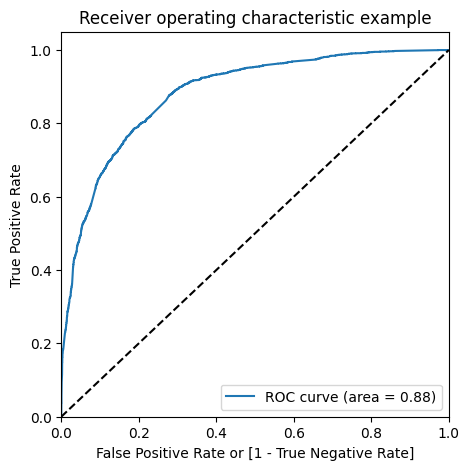

In [683]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)